# Loading Dataset

In [ ]:
import kagglehub
path = kagglehub.dataset_download("d4rklucif3r/cat-and-dogs")

100%|██████████| 218M/218M [00:01<00:00, 160MB/s]

Extracting files...


# Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

# Preparing Training and Validation Data

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory=f'{path}/dataset/training_set/',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 8000 files belonging to 2 classes.


In [ ]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory=f'{path}/dataset/test_set/',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 2000 files belonging to 2 classes.


# Normalization

In [ ]:
# Normalize
def process(image, label):
  tf.cast(image/255, tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# CNN Architecture

In [ ]:
# CNN Architecture
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

# Model Compilation and Training

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
CNN = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - accuracy: 0.5565 - loss: 5.7653 - val_accuracy: 0.5810 - val_loss: 1.3292
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - accuracy: 0.5699 - loss: 0.9781 - val_accuracy: 0.5430 - val_loss: 0.7049
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.5612 - loss: 0.6971 - val_accuracy: 0.5450 - val_loss: 0.6711
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.5650 - loss: 0.6808 - val_accuracy: 0.5655 - val_loss: 1.1551
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.5891 - loss: 0.6379 - val_accuracy: 0.6350 - val_loss: 0.7561
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.6164 - loss: 0.6214 - val_accuracy: 0.6710 - val_loss: 0.9670
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.6348 - loss: 0.6072 - val_accuracy: 0.6110 - val_loss: 0.6224
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.6858 - loss: 0.5253 - 

# History

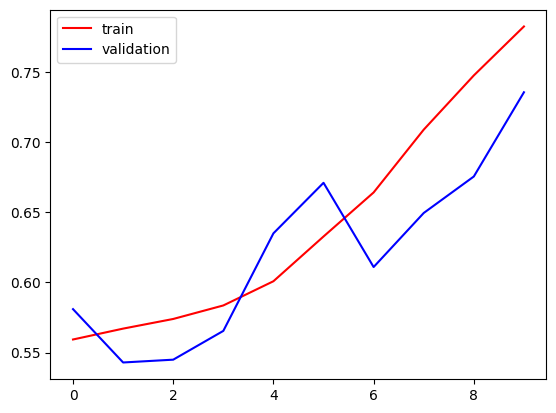

In [ ]:
import matplotlib.pyplot as plt

plt.plot(CNN.history['accuracy'], color='red', label='train')
plt.plot(CNN.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

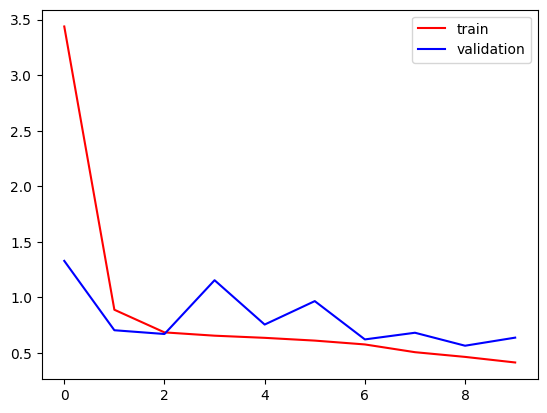

In [ ]:
plt.plot(CNN.history['loss'], color='red', label='train')
plt.plot(CNN.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()